In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras import regularizers
# import pydot
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
# from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [165]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-2023 00:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-2023 00:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-2023 00:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-2023 00:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-2023 00:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [166]:
X = df.drop(columns=['Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [167]:
# # scaler = StandardScaler()
# scaler = MinMaxScaler()
# # scaler = RobustScaler()


# X_scaled = scaler.fit_transform(X)


In [168]:
# # LSTM
# X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
#     X, y, test_size=0.2, random_state=40) # x_train, X_test, y_train, y_tests

# X_train_val_lstm, X_val_lstm, y_train_val_lstm, y_val_lstm = train_test_split(
#     X_train_lstm, y_train_lstm, test_size=0.25, random_state=40)  # X_val , x_test, y_val , y_test

# print("Shape of X_train:", X_train_lstm.shape)
# print("Shape of X_test:", X_test_lstm.shape)

# print("Shape of X_val:", X_val_lstm.shape)
# print("Shape of y_val:", y_val_lstm.shape)

# print("Shape of y_train:", y_train_lstm.shape)
# print("Shape of y_test:", y_test_lstm.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (8000, 18)
Shape of X_test: (2000, 18)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [169]:
X_train_val, X_val_test, y_train_val, y_val_test = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42)

print("Shape of X_train_val:", X_train_val.shape)
print("Shape of X_val_test:", X_test.shape)

print("Shape of y_train_val:", y_train_val.shape)
print("Shape of X_val_test:", X_val_test.shape)


Shape of X_train_val: (4000, 18)
Shape of X_val_test: (2000, 18)
Shape of y_train_val: (4000,)
Shape of X_val_test: (4000, 18)


In [170]:
# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = RobustScaler()
# scaler.fit(X_train_lstm)

# X_scaled = scaler.transform(X_train_lstm)
# print("X_scaled: ", X_scaled.shape)

# X_scaled_test = scaler.transform(X_test_lstm)
# print("X_scaled_test: ", X_scaled_test.shape)

# X_val_train = scaler.transform(X_train_val_lstm)
# print("X_Val_train: ", X_val_train.shape)

scaler.fit(X_train)

X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

X_train_val_n = scaler.transform(X_train_val)


In [171]:
# if np.isnan(X_train_n).any() or np.isinf(X_train_n).any():
#     raise ValueError("NaN or infinite values found in X_train_n")


In [172]:
sequence_length = X_train.shape[1]
num_features = 1
print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  18
Num of features:  1


In [173]:
total_samples = len(y_train)  # 8000

class_0_samples = np.sum(y_train == 0)  # 7614
class_1_samples = np.sum(y_train == 1)  # 386

weight_for_0 = total_samples / class_0_samples
weight_for_1 = total_samples / class_1_samples

class_weights = {0: weight_for_0, 1: weight_for_1}


In [174]:
# lstm_model = Sequential()
# lstm_model.add(LSTM(64, input_shape=(sequence_length, num_features)))
# lstm_model.add(Dense(1, activation='relu'))
# lstm_model.add(Dropout(0.3))


lstm_model = Sequential()
lstm_model.add(LSTM(units=64, return_sequences=True,
               input_shape=(sequence_length, num_features)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=64, return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=32, return_sequences=True))
lstm_model.add(Dropout(0.2))

# lstm_model.add(LSTM(units=64))
# lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(units=1))


In [175]:
dot_model = model_to_dot(lstm_model, show_shapes=True)

dot_model.write_png('lstm_model.png')


In [176]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='mean_squared_error', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 11s 26ms/step - loss: 0.5191 - accuracy: 0.6967 - val_loss: 12.3685 - val_accuracy: 0.0503
Epoch 2/10
250/250 [==============================] - 5s 21ms/step - loss: 0.3983 - accuracy: 0.7815 - val_loss: 17.9686 - val_accuracy: 0.0503
Epoch 3/10
250/250 [==============================] - 5s 20ms/step - loss: 0.3457 - accuracy: 0.7845 - val_loss: 12.9090 - val_accuracy: 0.0503
Epoch 4/10
250/250 [==============================] - 5s 20ms/step - loss: 0.2499 - accuracy: 0.8499 - val_loss: 7.2656 - val_accuracy: 0.0503
Epoch 5/10
250/250 [==============================] - 5s 22ms/step - loss: 0.1858 - accuracy: 0.8911 - val_loss: 5.8846 - val_accuracy: 0.0503
Epoch 6/10
250/250 [==============================] - 5s 22ms/step - loss: 0.1462 - accuracy: 0.9245 - val_loss: 4.3367 - val_accuracy: 0.0503
Epoch 7/10
250/250 [==============================] - 6s 22ms/step - loss: 0.1324 - accuracy: 0.9292 - val_loss: 2.7473 - val_accuracy: 0.

In [177]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='mean_squared_error', metrics=['accuracy'])


# lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
#                                     epochs=10, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))
lstm_nadam_history = lstm_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 9s 23ms/step - loss: 0.0927 - accuracy: 0.9487 - val_loss: 0.7102 - val_accuracy: 0.0503
Epoch 2/10
250/250 [==============================] - 5s 20ms/step - loss: 0.0885 - accuracy: 0.9462 - val_loss: 0.7175 - val_accuracy: 0.0503
Epoch 3/10
250/250 [==============================] - 5s 21ms/step - loss: 0.0851 - accuracy: 0.9498 - val_loss: 0.5713 - val_accuracy: 0.0503
Epoch 4/10
250/250 [==============================] - 5s 21ms/step - loss: 0.0800 - accuracy: 0.9499 - val_loss: 0.5349 - val_accuracy: 0.0503
Epoch 5/10
250/250 [==============================] - 5s 21ms/step - loss: 0.0786 - accuracy: 0.9500 - val_loss: 0.5312 - val_accuracy: 0.0503
Epoch 6/10
250/250 [==============================] - 5s 21ms/step - loss: 0.0750 - accuracy: 0.9518 - val_loss: 0.5438 - val_accuracy: 0.0503
Epoch 7/10
250/250 [==============================] - 5s 21ms/step - loss: 0.0730 - accuracy: 0.9493 - val_loss: 0.5102 - val_accuracy: 0.0503

In [178]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='mean_squared_error', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 8s 21ms/step - loss: 0.0655 - accuracy: 0.9552 - val_loss: 0.6294 - val_accuracy: 0.0503
Epoch 2/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0646 - accuracy: 0.9592 - val_loss: 0.6332 - val_accuracy: 0.0503
Epoch 3/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0648 - accuracy: 0.9567 - val_loss: 0.6315 - val_accuracy: 0.0503
Epoch 4/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0642 - accuracy: 0.9569 - val_loss: 0.6326 - val_accuracy: 0.0503
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0643 - accuracy: 0.9571 - val_loss: 0.6305 - val_accuracy: 0.0503
Epoch 6/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0647 - accuracy: 0.9563 - val_loss: 0.6331 - val_accuracy: 0.0503
Epoch 7/10
250/250 [==============================] - 6s 23ms/step - loss: 0.0634 - accuracy: 0.9556 - val_loss: 0.6319 - val_accuracy: 0.0503

In [179]:
lstm_sgd_optimizer = SGD(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_sgd_optimizer,
                   loss='mean_squared_error', metrics=['accuracy'])

lstm_sgd_history = lstm_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 8s 22ms/step - loss: 0.0637 - accuracy: 0.9556 - val_loss: 0.6332 - val_accuracy: 0.0503
Epoch 2/10
250/250 [==============================] - 6s 22ms/step - loss: 0.0649 - accuracy: 0.9539 - val_loss: 0.6314 - val_accuracy: 0.0503
Epoch 3/10
250/250 [==============================] - 5s 20ms/step - loss: 0.0637 - accuracy: 0.9547 - val_loss: 0.6323 - val_accuracy: 0.0503
Epoch 4/10
250/250 [==============================] - 5s 21ms/step - loss: 0.0630 - accuracy: 0.9546 - val_loss: 0.6294 - val_accuracy: 0.0503
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0628 - accuracy: 0.9554 - val_loss: 0.6324 - val_accuracy: 0.0503
Epoch 6/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0622 - accuracy: 0.9552 - val_loss: 0.6339 - val_accuracy: 0.0503
Epoch 7/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0620 - accuracy: 0.9542 - val_loss: 0.6290 - val_accuracy: 0.0503

In [180]:
lstm_rms_optimizer = RMSprop(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_rms_optimizer,
                   loss='mean_squared_error', metrics=['accuracy'])

lstm_rms_history = lstm_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 9s 22ms/step - loss: 0.0680 - accuracy: 0.9550 - val_loss: 0.6318 - val_accuracy: 0.0503
Epoch 2/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0658 - accuracy: 0.9537 - val_loss: 0.6167 - val_accuracy: 0.0503
Epoch 3/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0661 - accuracy: 0.9536 - val_loss: 0.6535 - val_accuracy: 0.0503
Epoch 4/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0667 - accuracy: 0.9564 - val_loss: 0.6468 - val_accuracy: 0.0503
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0647 - accuracy: 0.9548 - val_loss: 0.6289 - val_accuracy: 0.0503
Epoch 6/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0653 - accuracy: 0.9557 - val_loss: 0.6157 - val_accuracy: 0.0503
Epoch 7/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0648 - accuracy: 0.9562 - val_loss: 0.6266 - val_accuracy: 0.0506

In [181]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 1s 6ms/step - loss: 0.6585 - accuracy: 0.0506
Test LSTM Loss:  0.6585113406181335
Test LSTM Accuracy:  0.05055555701255798


In [182]:
lstm_train_probs = lstm_model.predict(X_train_n, verbose=0)
lstm_train_classes = (lstm_train_probs > 0.5).astype("int32")

lstm_train_probs = lstm_train_probs[:, 0]
lstm_train_classes = lstm_train_classes[:, 0]

lstm_train_accuracy = accuracy_score(y_train, lstm_train_classes)
print("Accuracy: ", lstm_train_accuracy)

lstm_train_precision = precision_score(
    y_train, lstm_train_classes, zero_division=1)
print("Precision: ", lstm_train_precision)

lstm_train_recall = recall_score(y_train, lstm_train_classes, zero_division=1)
print("Recall: ", lstm_train_recall)

train_f1_score_value_lstm = f1_score(
    y_train, lstm_train_classes, zero_division=1)
print("F1 score: ", train_f1_score_value_lstm)

# y_pred = lstm_model.predict(X_test)
# y_pred_classes = (y_pred > 0.5).astype("int32")
# report = classification_report(y_test, y_pred_classes)
# print(report)


Accuracy:  0.362875
Precision:  0.05090562440419447
Recall:  0.6917098445595855
F1 score:  0.09483217900905701


In [183]:
lstm_probs = lstm_model.predict(X_test_n, verbose=0)
lstm_classes = (lstm_probs > 0.5).astype("int32")

lstm_probs = lstm_probs[:, 0]
lstm_classes = lstm_classes[:, 0]

lstm_accuracy = accuracy_score(y_test, lstm_classes)
print("Accuracy: ", lstm_accuracy)

lstm_precision = precision_score(y_test, lstm_classes, zero_division=1)
print("Precision: ", lstm_precision)

lstm_recall = recall_score(y_test, lstm_classes, zero_division=1)
print("Recall: ", lstm_recall)

f1_score_value_lstm = f1_score(y_test, lstm_classes, zero_division=1)
print("F1 score: ", f1_score_value_lstm)


Accuracy:  0.3665
Precision:  0.05359877488514548
Recall:  0.693069306930693
F1 score:  0.09950248756218905


In [184]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']


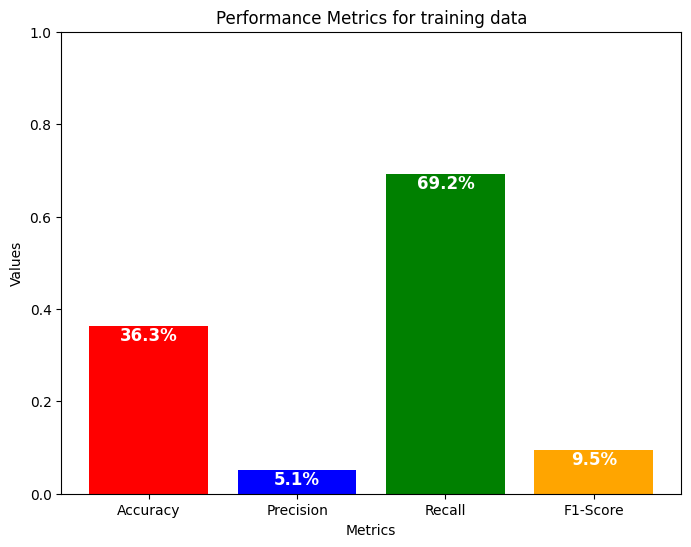

In [185]:
lstm_train_values = [lstm_train_accuracy, lstm_train_precision,
                     lstm_train_recall, train_f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_train_matrix_bars = plt.bar(metrics, lstm_train_values, color=['red',
                                                                    'blue', 'green', 'orange'])
for bar in lstm_train_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training data')
plt.ylim([0, 1])
plt.show()


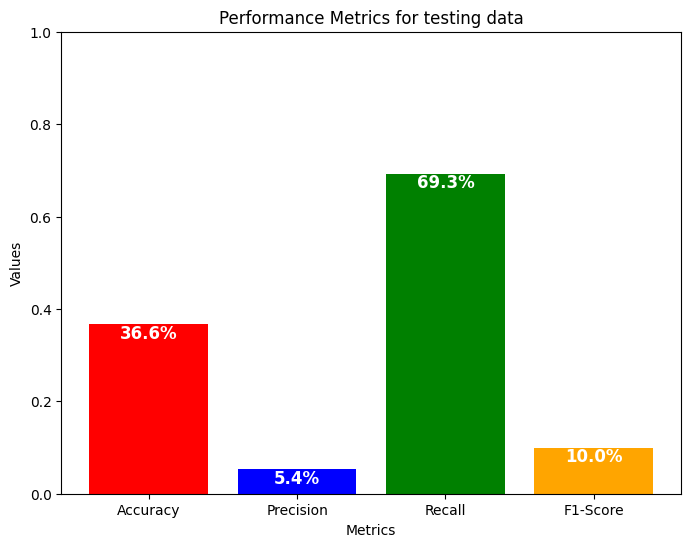

In [186]:
lstm_values = [lstm_accuracy, lstm_precision, lstm_recall, f1_score_value_lstm]

plt.figure(figsize=(8, 6))
lstm_matrix_bars = plt.bar(metrics, lstm_values, color=['red',
                           'blue', 'green', 'orange'])
for bar in lstm_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for testing data')
plt.ylim([0, 1])
plt.show()


In [187]:
# # GRU
# X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
#     X_scaled, y, test_size=0.2, random_state=40)

# X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
#     X_temp_gru, y_temp_gru, test_size=0.3, random_state=40)

# X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
# X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
# X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


# X_train_gru, X_val_gru, y_train_gru, y_val_gru = train_test_split(
#     X_train_n, y_train, test_size=0.2, random_state=40)


In [188]:
gru_model = Sequential()

gru_model.add(GRU(units=64, return_sequences=True,
              input_shape=(sequence_length, num_features)))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(units=32, return_sequences=True))
gru_model.add(Dropout(0.2))

gru_model.add(Dense(units=1))


In [189]:
dot_model = model_to_dot(gru_model, show_shapes=True)

dot_model.write_png('gru_model.png')


In [190]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='mean_squared_error', metrics=['accuracy'])
gru_adam_history = gru_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 11s 21ms/step - loss: 0.4594 - accuracy: 0.7056 - val_loss: 23.0765 - val_accuracy: 0.0503
Epoch 2/10
250/250 [==============================] - 4s 18ms/step - loss: 0.3682 - accuracy: 0.7672 - val_loss: 22.2294 - val_accuracy: 0.0503
Epoch 3/10
250/250 [==============================] - 5s 20ms/step - loss: 0.3493 - accuracy: 0.7704 - val_loss: 23.4377 - val_accuracy: 0.0503
Epoch 4/10
250/250 [==============================] - 5s 20ms/step - loss: 0.3463 - accuracy: 0.7631 - val_loss: 21.0038 - val_accuracy: 0.0503
Epoch 5/10
250/250 [==============================] - 5s 20ms/step - loss: 0.3329 - accuracy: 0.7714 - val_loss: 19.8676 - val_accuracy: 0.0503
Epoch 6/10
250/250 [==============================] - 5s 18ms/step - loss: 0.3082 - accuracy: 0.7950 - val_loss: 10.1732 - val_accuracy: 0.0503
Epoch 7/10
250/250 [==============================] - 5s 18ms/step - loss: 0.1861 - accuracy: 0.9007 - val_loss: 4.9768 - val_accuracy:

In [191]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='mean_squared_error', metrics=['accuracy'])
gru_nadam_history = gru_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 8s 19ms/step - loss: 0.0795 - accuracy: 0.9568 - val_loss: 2.5560 - val_accuracy: 0.0503
Epoch 2/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0751 - accuracy: 0.9550 - val_loss: 2.0933 - val_accuracy: 0.0503
Epoch 3/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0758 - accuracy: 0.9564 - val_loss: 2.1775 - val_accuracy: 0.0503
Epoch 4/10
250/250 [==============================] - 5s 21ms/step - loss: 0.0725 - accuracy: 0.9537 - val_loss: 1.7360 - val_accuracy: 0.0503
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 0.0683 - accuracy: 0.9597 - val_loss: 1.5816 - val_accuracy: 0.0503
Epoch 6/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0687 - accuracy: 0.9570 - val_loss: 1.3201 - val_accuracy: 0.0503
Epoch 7/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0657 - accuracy: 0.9585 - val_loss: 1.3320 - val_accuracy: 0.0503

In [192]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='mean_squared_error', metrics=['accuracy'])
gru_adagrad_history = gru_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 8s 20ms/step - loss: 0.0607 - accuracy: 0.9563 - val_loss: 0.8930 - val_accuracy: 0.0503
Epoch 2/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0605 - accuracy: 0.9578 - val_loss: 0.9029 - val_accuracy: 0.0503
Epoch 3/10
250/250 [==============================] - 4s 16ms/step - loss: 0.0604 - accuracy: 0.9561 - val_loss: 0.8942 - val_accuracy: 0.0503
Epoch 4/10
250/250 [==============================] - 4s 16ms/step - loss: 0.0603 - accuracy: 0.9568 - val_loss: 0.8937 - val_accuracy: 0.0503
Epoch 5/10
250/250 [==============================] - 4s 16ms/step - loss: 0.0603 - accuracy: 0.9568 - val_loss: 0.8994 - val_accuracy: 0.0503
Epoch 6/10
250/250 [==============================] - 4s 16ms/step - loss: 0.0606 - accuracy: 0.9560 - val_loss: 0.8942 - val_accuracy: 0.0503
Epoch 7/10
250/250 [==============================] - 4s 16ms/step - loss: 0.0601 - accuracy: 0.9564 - val_loss: 0.8959 - val_accuracy: 0.0503

In [193]:
gru_sgd_optimizer = SGD(learning_rate=0.001)
gru_model.compile(optimizer=gru_sgd_optimizer,
                  loss='mean_squared_error', metrics=['accuracy'])
gru_sgd_history = gru_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 7s 18ms/step - loss: 0.0597 - accuracy: 0.9572 - val_loss: 0.8942 - val_accuracy: 0.0503
Epoch 2/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0603 - accuracy: 0.9560 - val_loss: 0.8947 - val_accuracy: 0.0503
Epoch 3/10
250/250 [==============================] - 4s 16ms/step - loss: 0.0598 - accuracy: 0.9564 - val_loss: 0.8957 - val_accuracy: 0.0503
Epoch 4/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0604 - accuracy: 0.9551 - val_loss: 0.8923 - val_accuracy: 0.0503
Epoch 5/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0611 - accuracy: 0.9566 - val_loss: 0.8950 - val_accuracy: 0.0503
Epoch 6/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0604 - accuracy: 0.9561 - val_loss: 0.8902 - val_accuracy: 0.0503
Epoch 7/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0607 - accuracy: 0.9572 - val_loss: 0.8978 - val_accuracy: 0.0503

In [194]:
gru_rms_optimizer = RMSprop(learning_rate=0.001)
gru_model.compile(optimizer=gru_rms_optimizer,
                  loss='mean_squared_error', metrics=['accuracy'])
gru_rms_history = gru_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 8s 20ms/step - loss: 0.0647 - accuracy: 0.9598 - val_loss: 0.8474 - val_accuracy: 0.0503
Epoch 2/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0624 - accuracy: 0.9604 - val_loss: 0.9010 - val_accuracy: 0.0503
Epoch 3/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0628 - accuracy: 0.9567 - val_loss: 0.8261 - val_accuracy: 0.0503
Epoch 4/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0620 - accuracy: 0.9575 - val_loss: 0.9050 - val_accuracy: 0.0503
Epoch 5/10
250/250 [==============================] - 4s 14ms/step - loss: 0.0624 - accuracy: 0.9614 - val_loss: 0.8634 - val_accuracy: 0.0503
Epoch 6/10
250/250 [==============================] - 4s 14ms/step - loss: 0.0616 - accuracy: 0.9587 - val_loss: 0.8589 - val_accuracy: 0.0503
Epoch 7/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0618 - accuracy: 0.9635 - val_loss: 0.8417 - val_accuracy: 0.0503

In [195]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


63/63 [==============================] - 1s 5ms/step - loss: 0.7600 - accuracy: 0.0505
Test GRU Loss:  0.760012149810791
Test GRU Accuracy:  0.05050000175833702


In [196]:
gru_train_probs = gru_model.predict(X_train_n, verbose=0)
gru_train_classes = (gru_train_probs > 0.5).astype("int32")

gru_train_probs = gru_train_probs[:, 0]
gru_train_classes = gru_train_classes[:, 0]

gru_train_accuracy = accuracy_score(y_train, gru_train_classes)
print("Accuracy: ", gru_train_accuracy)

gru_train_precision = precision_score(
    y_train, gru_train_classes, zero_division=1)
print("Precision: ", gru_train_precision)

gru_train_recall = recall_score(y_train, gru_train_classes, zero_division=1)
print("Recall: ", gru_train_recall)

train_f1_score_value_gru = f1_score(
    y_train, gru_train_classes, zero_division=1)
print("F1 score: ", train_f1_score_value_gru)

# y_pred = gru_model.predict(X_test)
# y_pred_classes = (y_pred > 0.5).astype("int32")
# report = classification_report(y_test, y_pred_classes)
# print(report)


Accuracy:  0.32275
Precision:  0.0508746876115673
Recall:  0.7383419689119171
F1 score:  0.09519038076152306


In [197]:
gru_probs = gru_model.predict(X_test_n, verbose=0)
gru_classes = (gru_probs > 0.5).astype("int32")

gru_probs = gru_probs[:, 0]
gru_classes = gru_classes[:, 0]

gru_accuracy = accuracy_score(y_test, gru_classes)
print("Accuracy: ", gru_accuracy)

gru_precision = precision_score(y_test, gru_classes, zero_division=1)
print("Precision: ", gru_precision)

gru_recall = recall_score(y_test, gru_classes, zero_division=1)
print("Recall: ", gru_recall)

f1_score_value_gru = f1_score(y_test, gru_classes, zero_division=1)
print("F1 score: ", f1_score_value_gru)


Accuracy:  0.329
Precision:  0.05133767172812726
Recall:  0.7029702970297029
F1 score:  0.09568733153638813


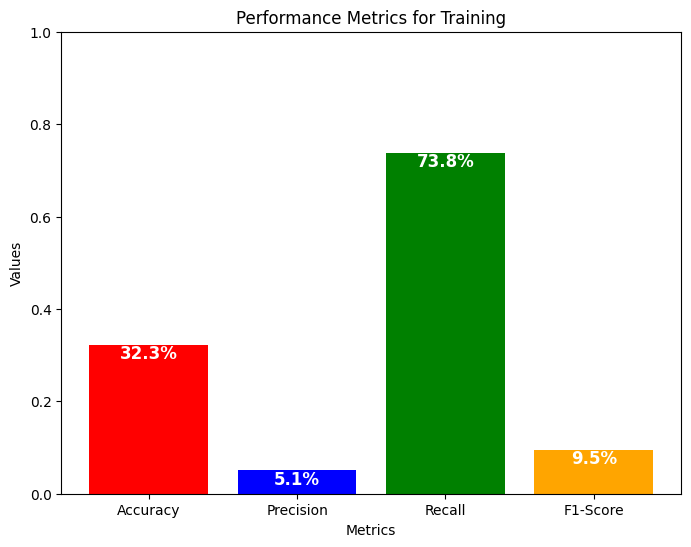

In [198]:
gru_values = [gru_train_accuracy, gru_train_precision,
              gru_train_recall, train_f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Training')
plt.ylim(0, 1)
plt.show()


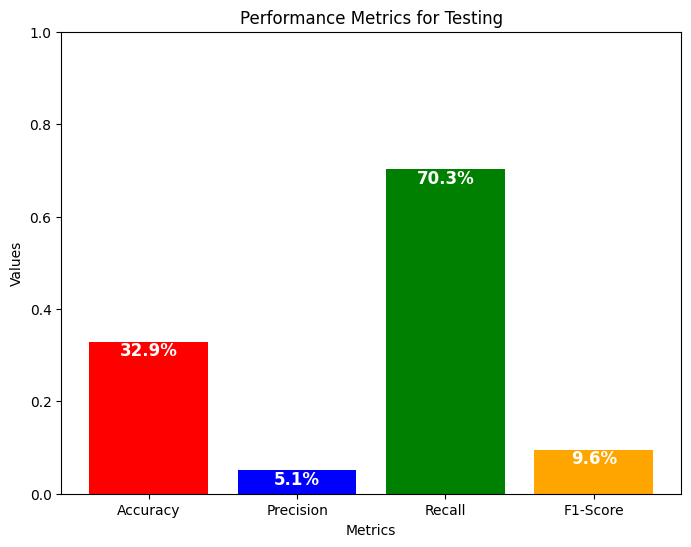

In [199]:
gru_values = [gru_accuracy, gru_precision, gru_recall, f1_score_value_gru]

plt.figure(figsize=(8, 6))
gru_matrix_bars = plt.bar(metrics, gru_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in gru_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Testing')
plt.ylim(0, 1)
plt.show()


In [200]:
# CNN
# X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
#     X_scaled, y, test_size=0.2, random_state=40)

# X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
#     X_temp_cnn, y_temp_cnn, test_size=0.3, random_state=40)

# X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn = train_test_split(
#     X_train_n, y_train, test_size=0.2, random_state=40)

# print("Shape of X_train:", X_train_cnn.shape)

# sequence_length = X_train_cnn.shape[1]
# num_features = 1

# X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
# X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
# X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


In [201]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=32, kernel_size=3,
              input_shape=(sequence_length, num_features)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=16, kernel_size=2))

cnn_model.add(MaxPooling1D(pool_size=1))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=1))

cnn_model.add(Dropout(0.2))


In [202]:
dot_model = model_to_dot(cnn_model, show_shapes=True)

dot_model.write_png('cnn_model.png')


In [203]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='mean_squared_error', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2516 - accuracy: 0.9626 - val_loss: 2257.8472 - val_accuracy: 0.0503
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2579 - accuracy: 0.9889 - val_loss: 3102.6370 - val_accuracy: 0.0503
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9901 - val_loss: 5606.1895 - val_accuracy: 0.0503
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9914 - val_loss: 6365.8525 - val_accuracy: 0.0505
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9914 - val_loss: 9879.7285 - val_accuracy: 0.0525
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.9902 - val_loss: 7731.3257 - val_accuracy: 0.0608
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9898 - val_loss: 13063.1201 - val_a

In [204]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='mean_squared_error', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2435 - accuracy: 0.9891 - val_loss: 4526.8081 - val_accuracy: 0.0918
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1938 - accuracy: 0.9915 - val_loss: 6637.4507 - val_accuracy: 0.0815
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9912 - val_loss: 9987.8691 - val_accuracy: 0.0830
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9908 - val_loss: 22027.5117 - val_accuracy: 0.0763
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9899 - val_loss: 6381.7456 - val_accuracy: 0.0855
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.9891 - val_loss: 8091.5771 - val_accuracy: 0.0970
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9900 - val_loss: 4147.2852 - val_a

In [205]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='mean_squared_error', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2179 - accuracy: 0.9902 - val_loss: 4382.9263 - val_accuracy: 0.0932
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9900 - val_loss: 4317.7275 - val_accuracy: 0.0940
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9898 - val_loss: 4232.0205 - val_accuracy: 0.0962
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2455 - accuracy: 0.9889 - val_loss: 4377.3862 - val_accuracy: 0.0948
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9896 - val_loss: 4534.9131 - val_accuracy: 0.0940
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.9895 - val_loss: 4767.8257 - val_accuracy: 0.0918
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9905 - val_loss: 4700.0615 - val_ac

In [206]:
cnn_sgd_optimizer = SGD(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_sgd_optimizer,
                  loss='mean_squared_error', metrics=['accuracy'])

cnn_sgd_history = cnn_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2283 - accuracy: 0.9898 - val_loss: 5196.5200 - val_accuracy: 0.0900
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2073 - accuracy: 0.9908 - val_loss: 5137.6294 - val_accuracy: 0.0922
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9898 - val_loss: 5216.3716 - val_accuracy: 0.0905
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9902 - val_loss: 5211.7192 - val_accuracy: 0.0922
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2378 - accuracy: 0.9893 - val_loss: 5201.5981 - val_accuracy: 0.0930
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2230 - accuracy: 0.9900 - val_loss: 5293.7783 - val_accuracy: 0.0918
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2151 - accuracy: 0.9904 - val_loss: 5345.6567 - val_ac

In [207]:
cnn_rms_optimizer = RMSprop(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_rms_optimizer,
                  loss='mean_squared_error', metrics=['accuracy'])

cnn_rms_history = cnn_model.fit(X_train_n, y_train, epochs=10, validation_data=(
    X_train_val, y_train_val), class_weight=class_weights)


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2281 - accuracy: 0.9899 - val_loss: 3954.6794 - val_accuracy: 0.0822
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9911 - val_loss: 7242.2456 - val_accuracy: 0.0900
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2330 - accuracy: 0.9896 - val_loss: 11146.2188 - val_accuracy: 0.0677
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2285 - accuracy: 0.9899 - val_loss: 13496.1172 - val_accuracy: 0.0810
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2397 - accuracy: 0.9893 - val_loss: 12310.7979 - val_accuracy: 0.0558
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2376 - accuracy: 0.9894 - val_loss: 5669.5366 - val_accuracy: 0.0787
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2475 - accuracy: 0.9889 - val_loss: 3002.6875 - val

In [208]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


63/63 [==============================] - 0s 2ms/step - loss: 18259.1191 - accuracy: 0.0650
Test CNN Loss:  18259.119140625
Test CNN Accuracy:  0.06499999761581421


In [209]:
cnn_train_probs = cnn_model.predict(X_train_n, verbose=0)
cnn_train_classes = (cnn_train_probs > 0.7).astype("int32")

cnn_train_probs = cnn_train_probs[:, 0]
cnn_train_classes = cnn_train_classes[:, 0]

cnn_train_accuracy = accuracy_score(y_train, cnn_train_classes)
print("Accuracy: ", cnn_train_accuracy)

cnn_train_precision = precision_score(
    y_train, cnn_train_classes, zero_division=1)
print("Precision: ", cnn_train_precision)

cnn_train_recall = recall_score(y_train, cnn_train_classes, zero_division=1)
print("Recall: ", cnn_train_recall)

train_f1_score_value_cnn = f1_score(
    y_train, cnn_train_classes, zero_division=1)
print("F1 score: ", train_f1_score_value_cnn)


Accuracy:  0.987
Precision:  1.0
Recall:  0.7305699481865285
F1 score:  0.8443113772455091


In [210]:
cnn_probs = cnn_model.predict(X_test_n, verbose=0)
cnn_classes = (cnn_probs > 0.7).astype("int32")

cnn_probs = cnn_probs[:, 0]
cnn_classes = cnn_classes[:, 0]

cnn_accuracy = accuracy_score(y_test, cnn_classes)
print("Accuracy: ", cnn_accuracy)

cnn_precision = precision_score(y_test, cnn_classes, zero_division=1)
print("Precision: ", cnn_precision)

cnn_recall = recall_score(y_test, cnn_classes, zero_division=1)
print("Recall: ", cnn_recall)

f1_score_value_cnn = f1_score(y_test, cnn_classes, zero_division=1)
print("F1 score: ", f1_score_value_cnn)


Accuracy:  0.99
Precision:  1.0
Recall:  0.801980198019802
F1 score:  0.8901098901098902


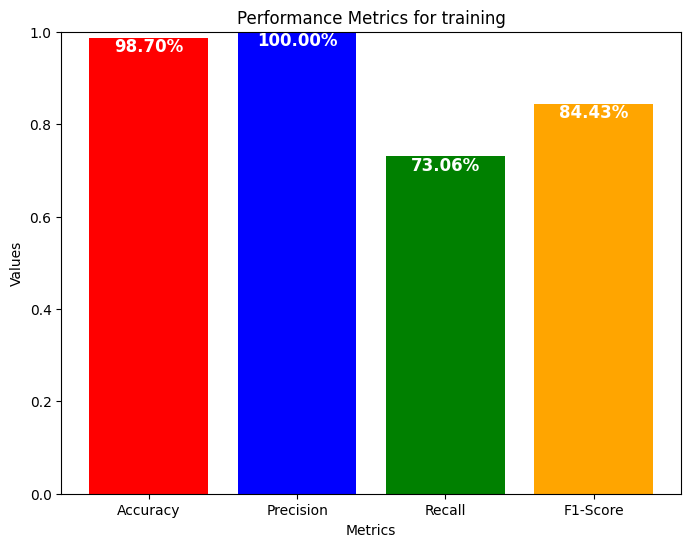

In [211]:
cnn_values = [cnn_train_accuracy, cnn_train_precision,
              cnn_train_recall, train_f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for training')
plt.ylim(0, 1)
plt.show()


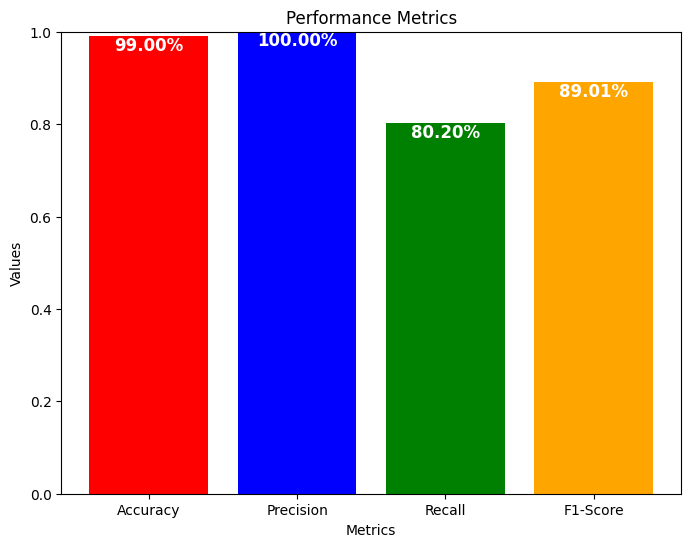

In [212]:
cnn_values = [cnn_accuracy, cnn_precision, cnn_recall, f1_score_value_cnn]

plt.figure(figsize=(8, 6))
cnn_matrix_bars = plt.bar(metrics, cnn_values, color=['red',
                          'blue', 'green', 'orange'])
for bar in cnn_matrix_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.2f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


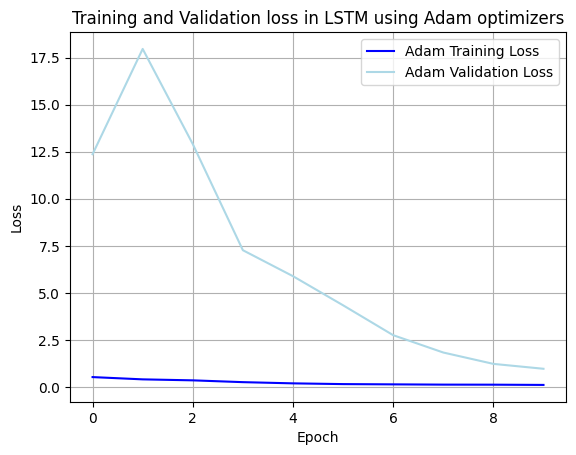

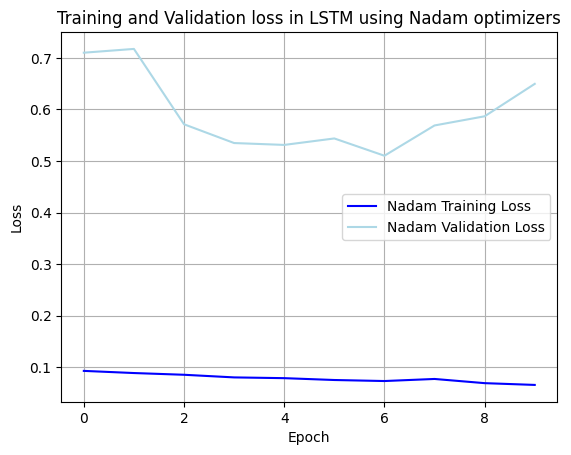

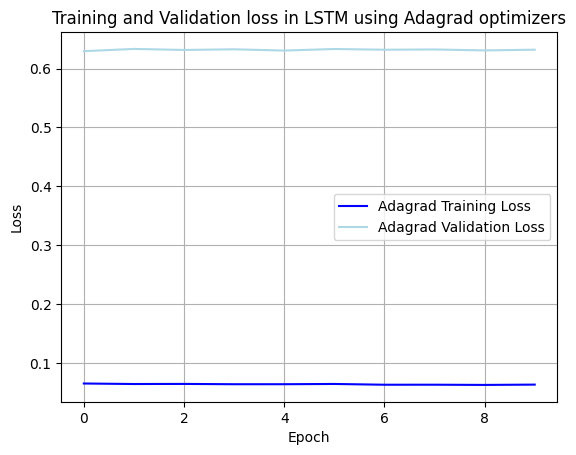

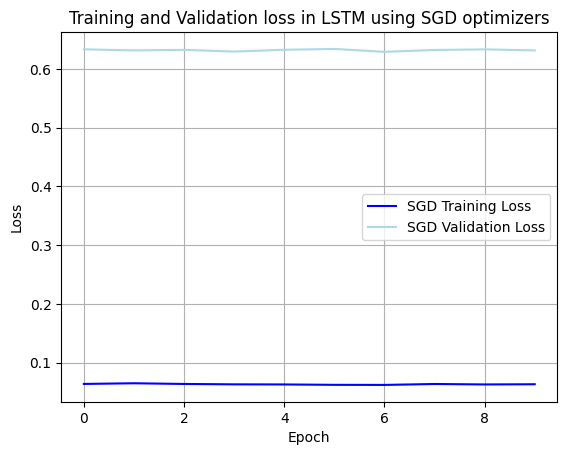

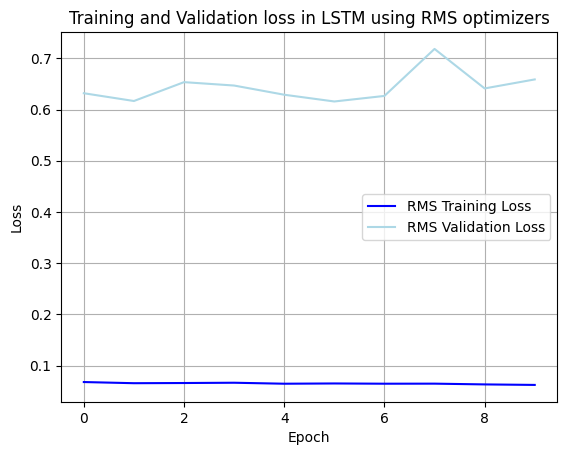

In [213]:
# ----- LSTM Adam Loss -----
plt.plot(lstm_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(lstm_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Loss -----
plt.plot(lstm_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(lstm_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Loss -----
plt.plot(lstm_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(lstm_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Loss -----
plt.plot(lstm_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(lstm_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Loss -----
plt.plot(lstm_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(lstm_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


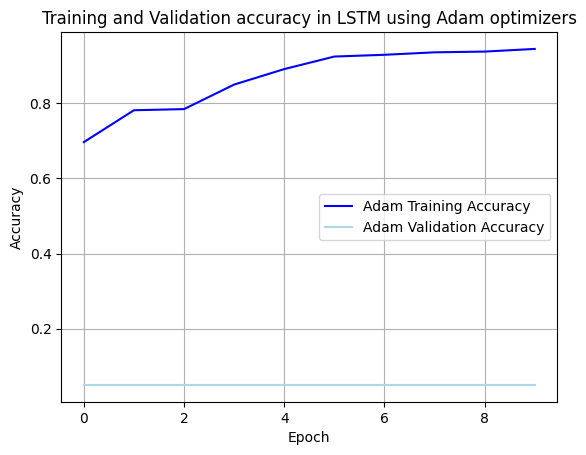

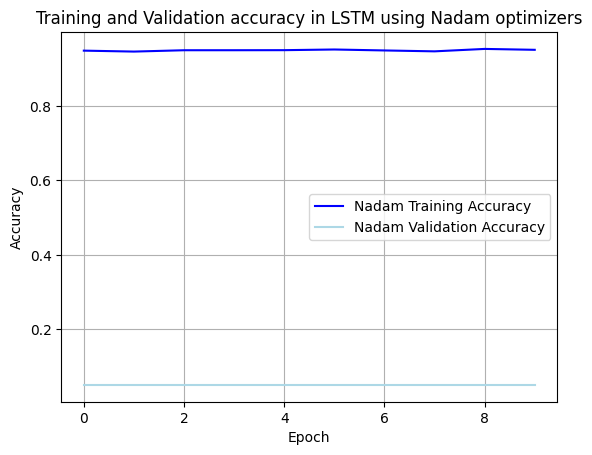

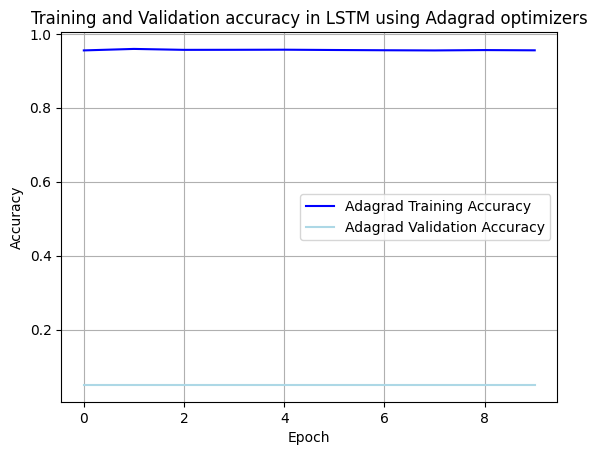

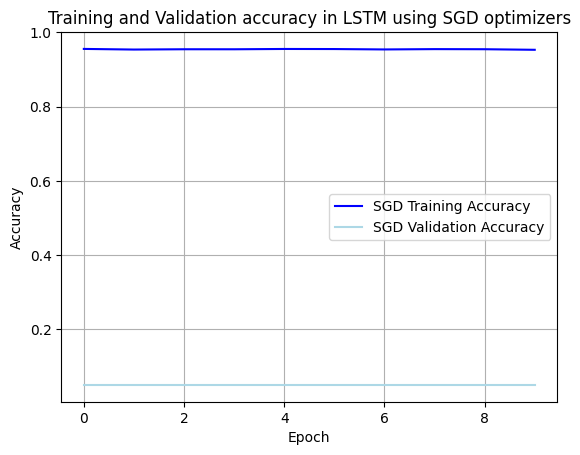

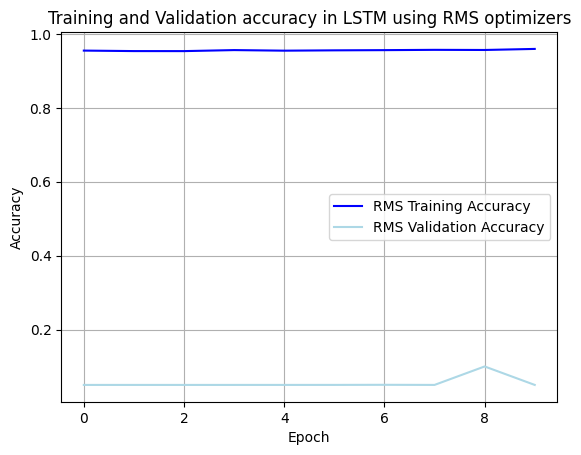

In [214]:
# ----- LSTM Adam Accuracy -----
plt.plot(lstm_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(lstm_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Accuracy -----
plt.plot(lstm_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(lstm_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Accuracy -----
plt.plot(lstm_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(lstm_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Accuracy -----
plt.plot(lstm_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(lstm_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Accuracy -----
plt.plot(lstm_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(lstm_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


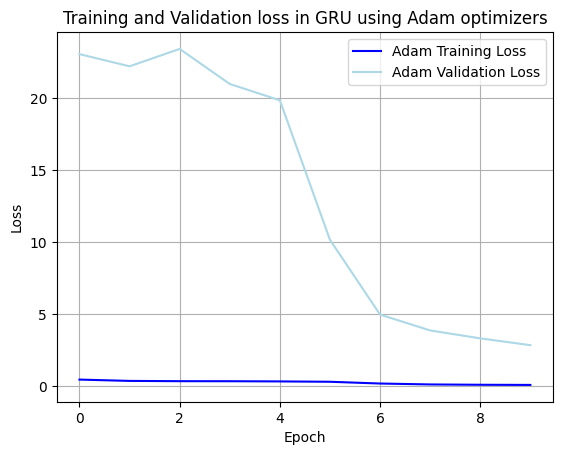

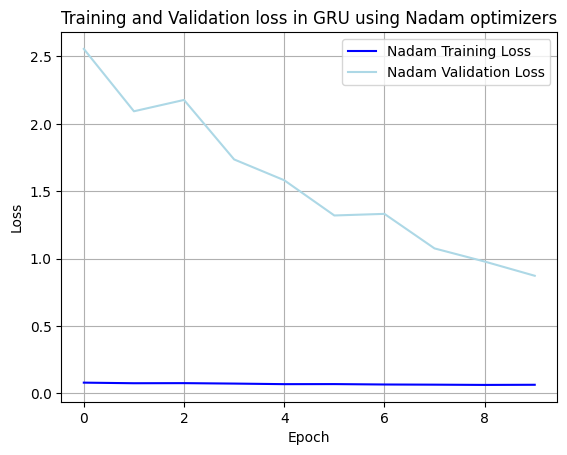

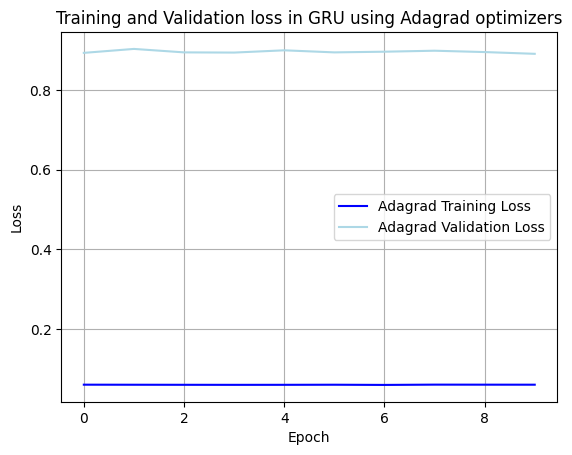

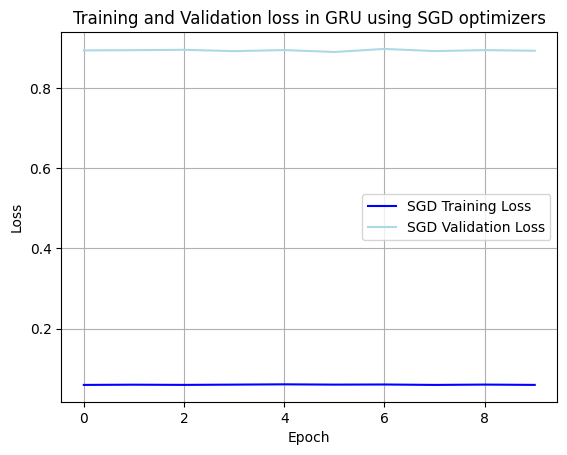

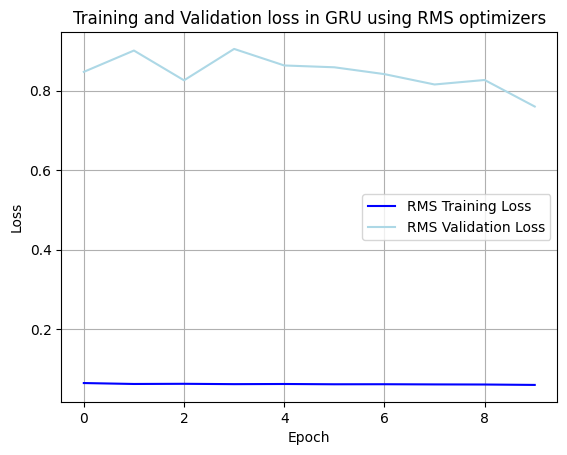

In [215]:
# ----- GRU Adam Loss -----
plt.plot(gru_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(gru_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Loss -----
plt.plot(gru_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(gru_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Loss -----
plt.plot(gru_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(gru_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Loss -----
plt.plot(gru_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(gru_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Loss -----
plt.plot(gru_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(gru_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


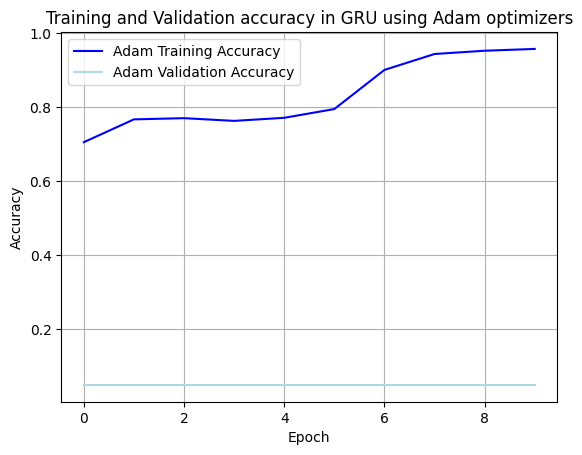

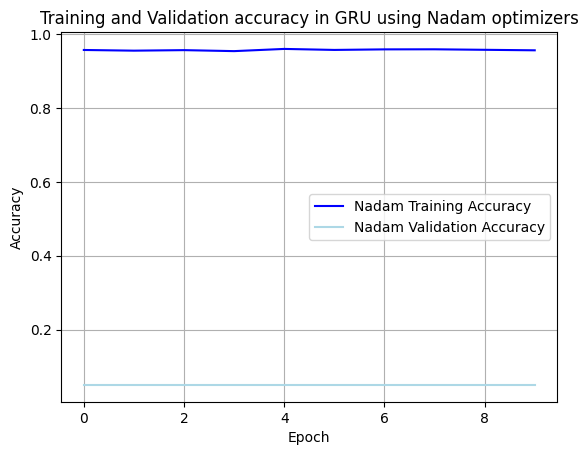

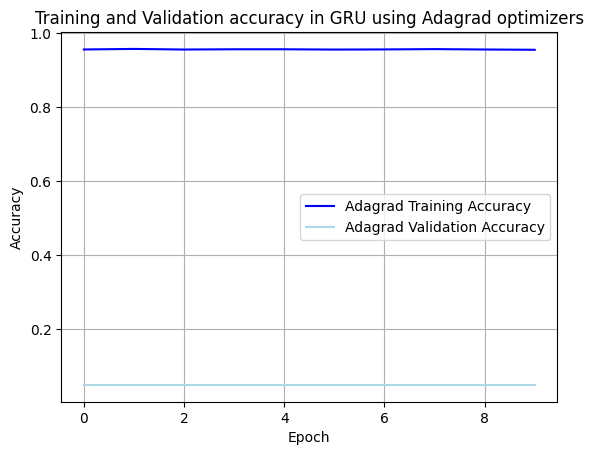

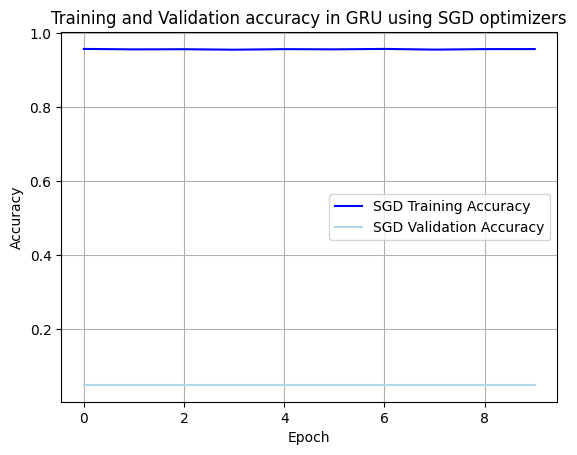

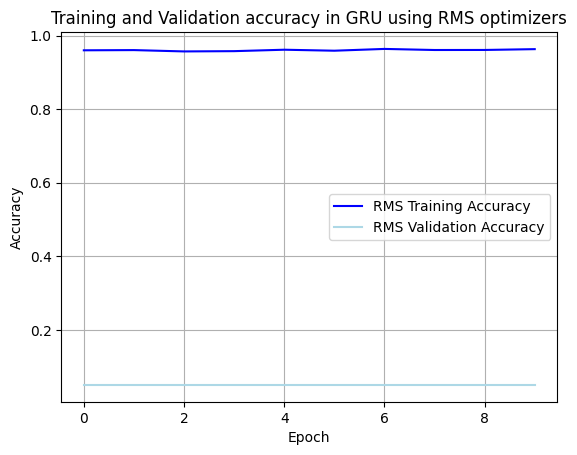

In [216]:
# ----- GRU Adam Accuracy -----
plt.plot(gru_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(gru_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Accuracy -----
plt.plot(gru_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(gru_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Accuracy -----
plt.plot(gru_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(gru_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Accuracy -----
plt.plot(gru_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(gru_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Accuracy -----
plt.plot(gru_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(gru_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


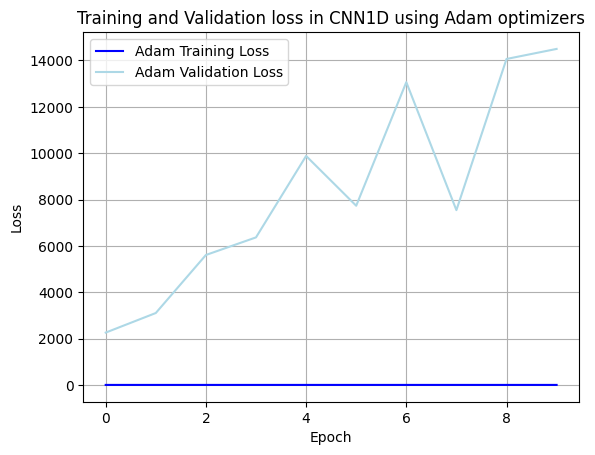

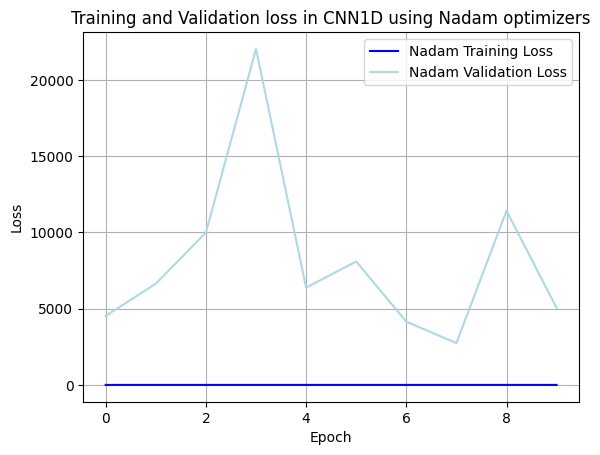

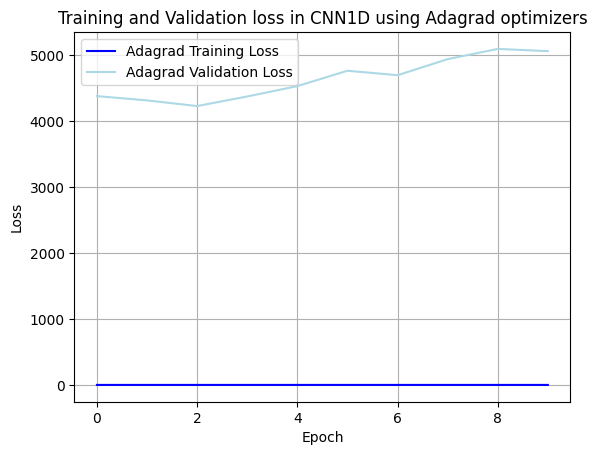

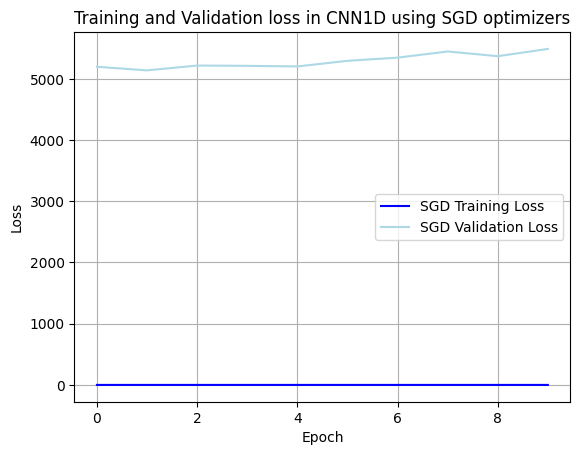

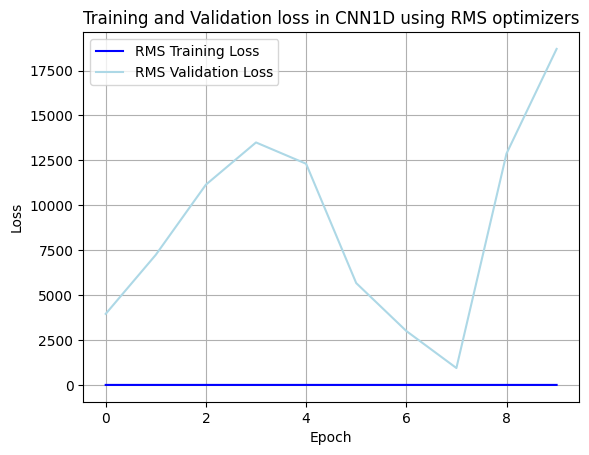

In [217]:
# ----- CNN1D Adam Loss -----
plt.plot(cnn_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(cnn_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Nadam Loss -----
plt.plot(cnn_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(cnn_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Adgrad Loss -----
plt.plot(cnn_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(cnn_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D SGD Loss -----
plt.plot(cnn_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(cnn_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D RMSProp Loss -----
plt.plot(cnn_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(cnn_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


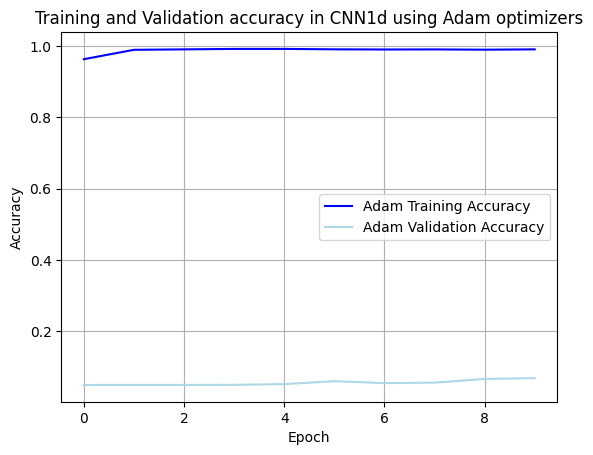

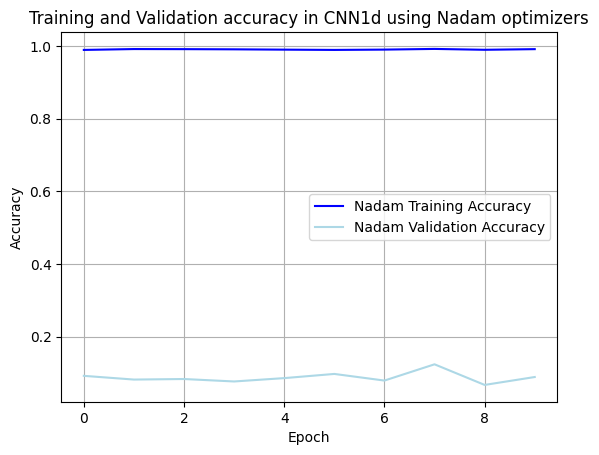

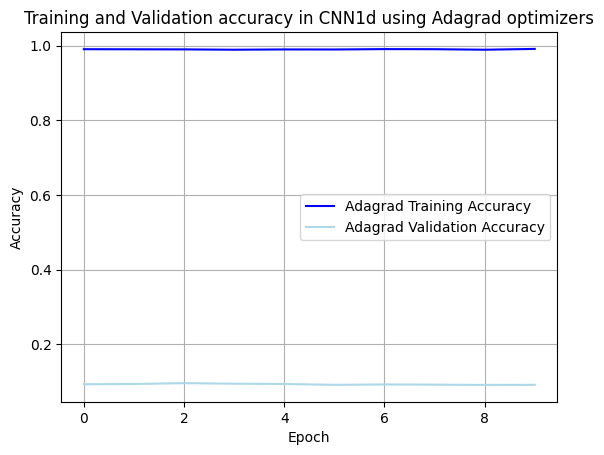

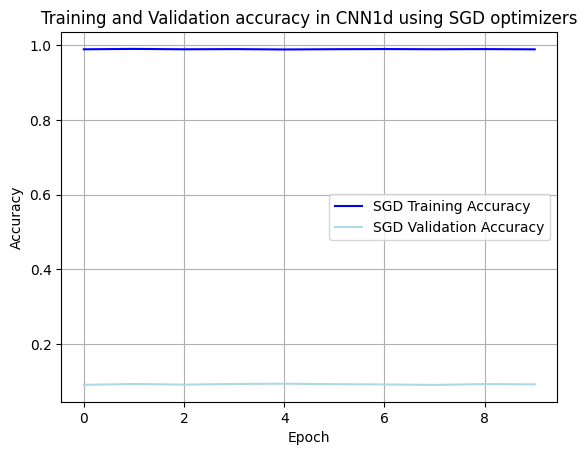

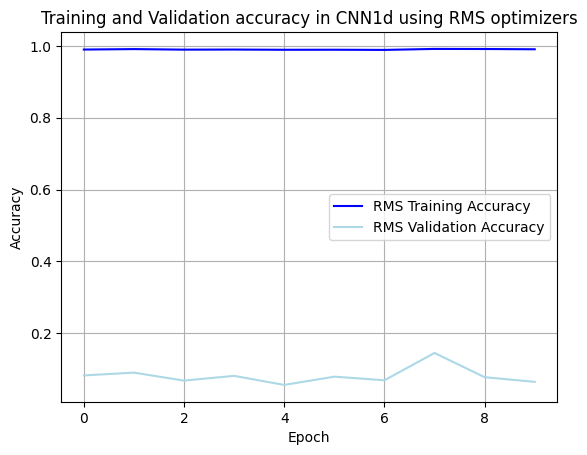

In [218]:
# ----- CNN1d Adam Accuracy -----
plt.plot(cnn_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(cnn_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Nadam Accuracy -----
plt.plot(cnn_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(cnn_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Adgrad Accuracy -----
plt.plot(cnn_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(cnn_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d SGD Accuracy -----
plt.plot(cnn_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(cnn_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d RMSProp Accuracy -----
plt.plot(cnn_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(cnn_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [219]:
# plt.figure(figsize=(12, 6))

# cnn_adam_h = np.mean(cnn_adam_history.history['loss'])
# cnn_nadam_h = np.mean(cnn_nadam_history.history['loss'])
# cnn_adagrad_h = np.mean(cnn_adagrad_history.history['loss'])
# cnn_sgd_h = np.mean(cnn_sgd_history.history['loss'])
# cnn_rms_h = np.mean(cnn_rms_history.history['loss'])

# cnn_adam_h_v = np.mean(cnn_adam_history.history['val_loss'])
# cnn_nadam_h_v = np.mean(cnn_nadam_history.history['val_loss'])
# cnn_adagrad_h_v = np.mean(cnn_adagrad_history.history['val_loss'])
# cnn_sgd_h_v = np.mean(cnn_sgd_history.history['val_loss'])
# cnn_rms_h_v = np.mean(cnn_rms_history.history['val_loss'])

# cnn_optimizers = [cnn_adam_h, cnn_nadam_h,
#                   cnn_adagrad_h, cnn_sgd_h, cnn_rms_h]
# cnn_optimizers_v = [cnn_adam_h_v, cnn_nadam_h_v,
#                     cnn_adagrad_h_v, cnn_sgd_h_v, cnn_rms_h_v]

# plt.plot(cnn_optimizers, label="Loss", color='blue')
# plt.plot(cnn_optimizers_v, label="Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [220]:
# plt.figure(figsize=(12, 6))

# cnn_adam_acc = np.mean(cnn_adam_history.history['accuracy'])
# cnn_nadam_acc = np.mean(cnn_nadam_history.history['accuracy'])
# cnn_adagrad_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_sgd_acc = np.mean(cnn_sgd_history.history['accuracy'])
# cnn_rms_acc = np.mean(cnn_rms_history.history['accuracy'])

# cnn_adam_val_acc = np.mean(cnn_adam_history.history['val_accuracy'])
# cnn_nadam_val_acc = np.mean(cnn_nadam_history.history['val_accuracy'])
# cnn_adagrad_val_acc = np.mean(cnn_adagrad_history.history['val_accuracy'])
# cnn_sgd_val_acc = np.mean(cnn_sgd_history.history['val_accuracy'])
# cnn_rms_val_acc = np.mean(cnn_rms_history.history['val_accuracy'])


# cnn_optimizers_acc = [cnn_adam_acc, cnn_nadam_acc,
#                       cnn_adagrad_acc, cnn_sgd_acc, cnn_rms_acc]
# cnn_optimizers_val_acc = [cnn_adam_val_acc, cnn_nadam_val_acc,
#                           cnn_adagrad_val_acc, cnn_sgd_val_acc, cnn_rms_val_acc]

# plt.plot(cnn_optimizers_acc, label="Accuracy", color='blue')
# plt.plot(cnn_optimizers_val_acc, label="Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


In [221]:
models = ['LSTM', 'GRU', '1D-CNN']


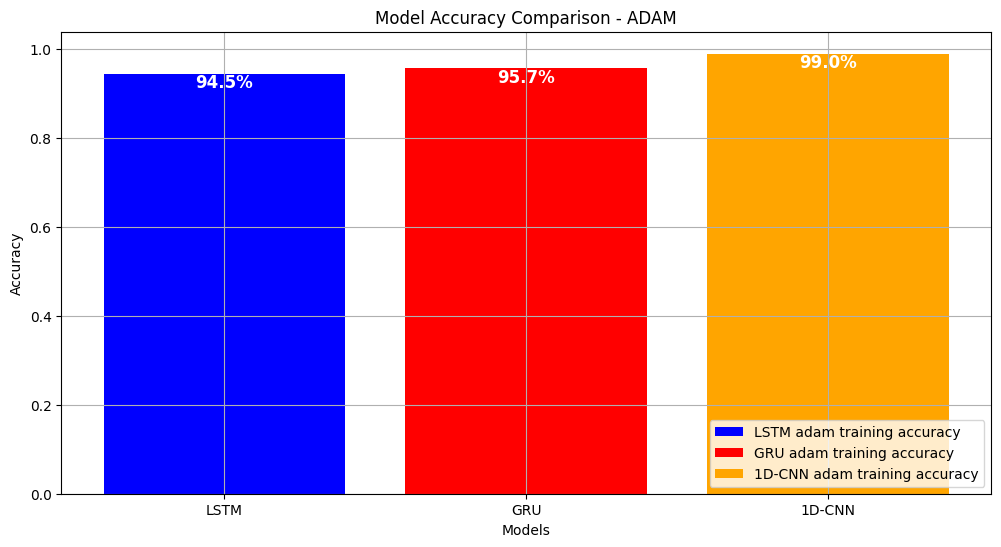

In [222]:
plt.figure(figsize=(12, 6))

# lstm_adam_train_acc = np.mean(lstm_adam_history.history["accuracy"])
# lstm_adam_val_acc = np.mean(lstm_adam_history.history["val_accuracy"])

# gru_adam_train_acc = np.mean(gru_adam_history.history["accuracy"])
# gru_adam_val_acc = np.mean(gru_adam_history.history["val_accuracy"])

# cnn_adam_train_acc = np.mean(cnn_adam_history.history["accuracy"])
# cnn_adam_val_acc = np.mean(cnn_adam_history.history["val_accuracy"])

adam_histories = [lstm_adam_history, gru_adam_history, cnn_adam_history]

# adam_accuracies = [lstm_adam_train_acc, gru_adam_train_acc, cnn_adam_train_acc]

adam_accuracies = [a_history.history['accuracy'][-1]
                   for a_history in adam_histories]

adam_bar = plt.bar(models, adam_accuracies, label=['LSTM adam training accuracy',
                                                   'GRU adam training accuracy', '1D-CNN adam training accuracy'], color=['blue', 'red', 'orange'])

for bar in adam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title("Model Accuracy Comparison - ADAM")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


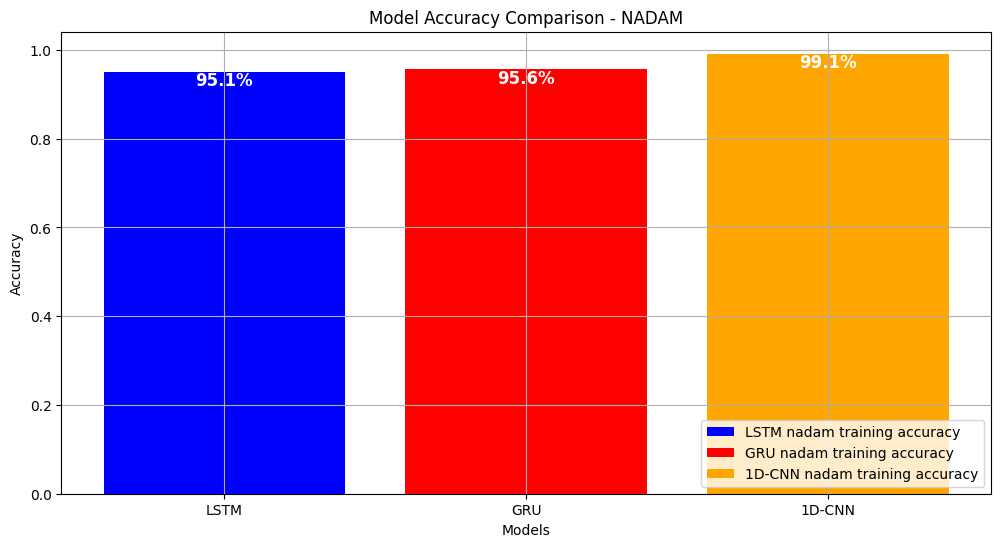

In [223]:
plt.figure(figsize=(12, 6))

# lstm_nadam_train_acc = np.mean(lstm_nadam_history.history["accuracy"])
# lstm_nadam_val_acc = lstm_nadam_history.history["val_accuracy"]

# gru_nadam_train_acc = np.mean(gru_nadam_history.history["accuracy"])
# gru_nadam_val_acc = gru_nadam_history.history["val_accuracy"]

# cnn_nadam_train_acc = np.mean(cnn_nadam_history.history["accuracy"])
# cnn_nadam_val_acc = cnn_nadam_history.history["val_accuracy"]

# nadam_accuracies = [lstm_nadam_train_acc,
#                     gru_nadam_train_acc, cnn_nadam_train_acc]

nadam_histories = [lstm_nadam_history, gru_nadam_history, cnn_nadam_history]

nadam_accuracies = [n_history.history['accuracy'][-1]
                    for n_history in nadam_histories]

nadam_bar = plt.bar(models, nadam_accuracies, label=['LSTM nadam training accuracy',
                                                     'GRU nadam training accuracy', '1D-CNN nadam training accuracy'], color=['blue', 'red', 'orange'])

for bar in nadam_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - NADAM')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


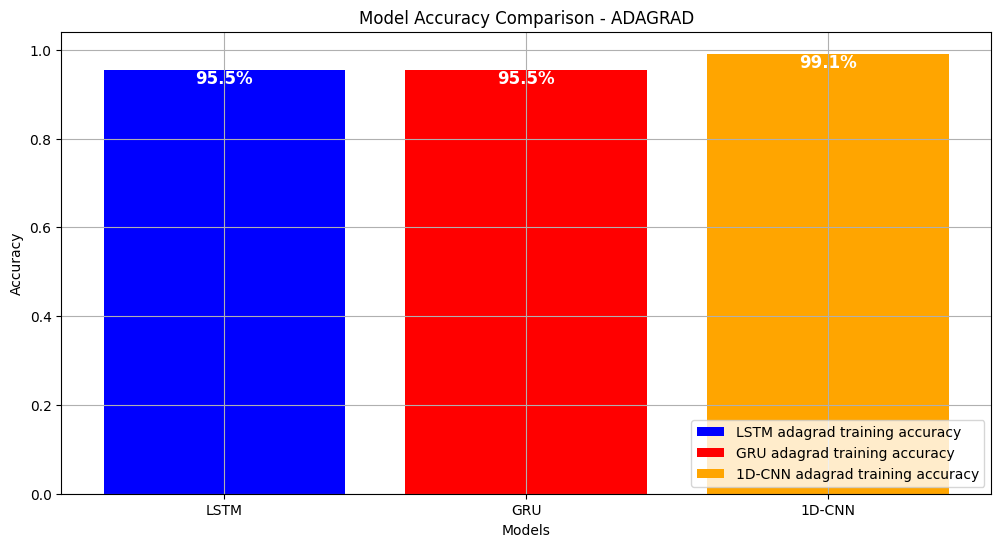

In [224]:
plt.figure(figsize=(12, 6))

# lstm_adagrad_train_acc = np.mean(lstm_adagrad_history.history['accuracy'])
# lstm_adagrad_val_acc = lstm_adagrad_history.history['val_accuracy']

# gru_adagrad_train_acc = np.mean(gru_adagrad_history.history['accuracy'])
# gru_adagrad_val_acc = gru_adagrad_history.history['val_accuracy']

# cnn_adagrad_train_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_adagrad_val_acc = cnn_adagrad_history.history['val_accuracy']

# adagrad_accuracies = [lstm_adagrad_train_acc,
#                       gru_adagrad_train_acc, cnn_adagrad_train_acc]

adagrad_histories = [lstm_adagrad_history,
                     gru_adagrad_history, cnn_adagrad_history]

adagrad_accuracies = [ad_history.history['accuracy'][-1]
                      for ad_history in adagrad_histories]

adagrad_bar = plt.bar(models, adagrad_accuracies,  label=['LSTM adagrad training accuracy',
                                                          'GRU adagrad training accuracy', '1D-CNN adagrad training accuracy'], color=['blue', 'red',  'orange'])

for bar in adagrad_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - ADAGRAD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


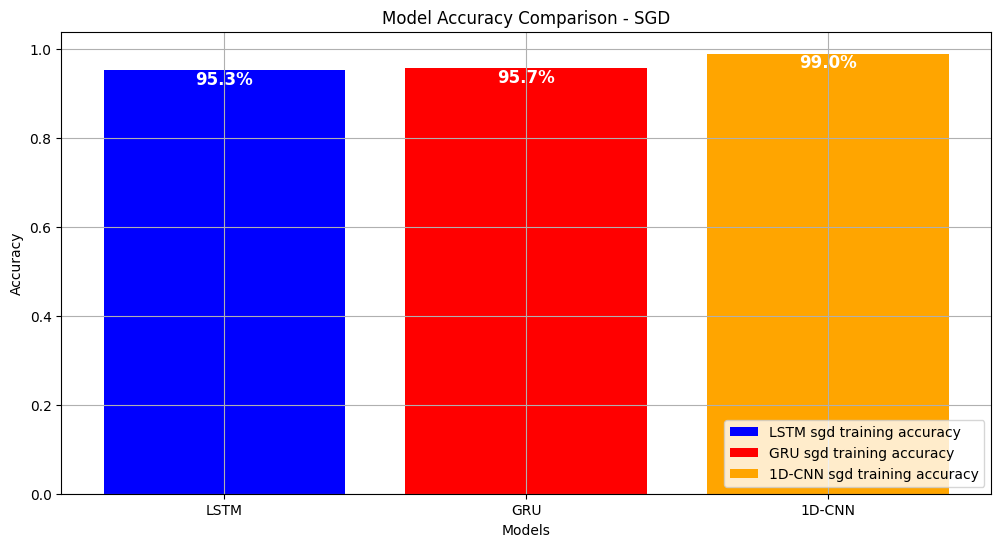

In [225]:
plt.figure(figsize=(12, 6))

# lstm_sgd_train_acc = np.mean(lstm_sgd_history.history['accuracy'])

# gru_sgd_train_acc = np.mean(gru_sgd_history.history['accuracy'])

# cnn_sgd_train_acc = np.mean(cnn_sgd_history.history['accuracy'])

# sgd_accuracies = [lstm_sgd_train_acc,
#                   gru_sgd_train_acc, cnn_sgd_train_acc]

sgd_histories = [lstm_sgd_history, gru_sgd_history, cnn_sgd_history]

sgd_accuracies = [sgd_history.history['accuracy'][-1]
                  for sgd_history in sgd_histories]

sgd_bar = plt.bar(models, sgd_accuracies,  label=['LSTM sgd training accuracy',
                                                  'GRU sgd training accuracy', '1D-CNN sgd training accuracy'], color=['blue', 'red',  'orange'])

for bar in sgd_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - SGD')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


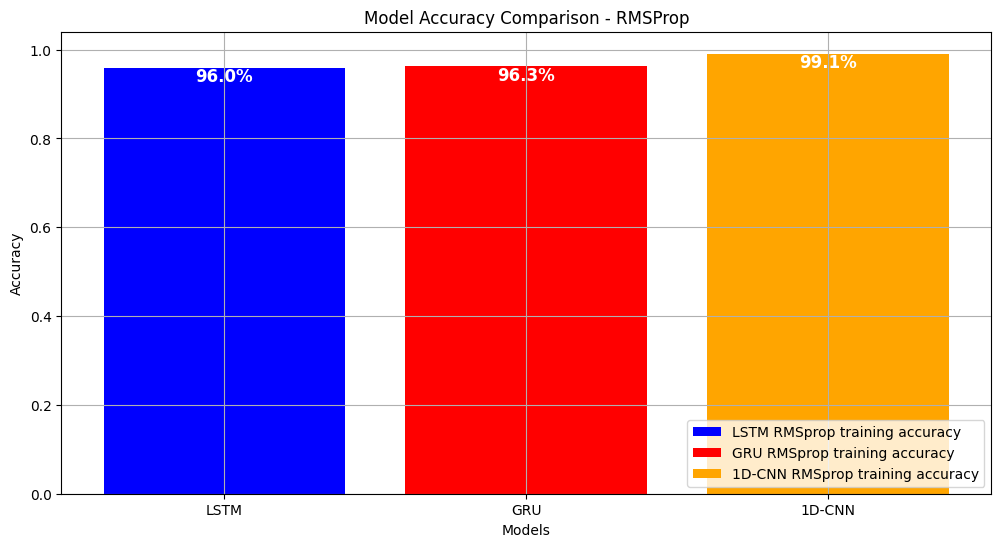

In [226]:
plt.figure(figsize=(12, 6))

# lstm_rms_train_acc = np.mean(lstm_rms_history.history['accuracy'])
# gru_rms_train_acc = np.mean(gru_rms_history.history['accuracy'])
# cnn_rms_train_acc = np.mean(cnn_rms_history.history['accuracy'])

# rms_accuracies = [lstm_rms_train_acc, gru_rms_train_acc, cnn_rms_train_acc]

rms_histories = [lstm_rms_history, gru_rms_history, cnn_rms_history]

rms_accuracies = [rms_history.history['accuracy'][-1]
                  for rms_history in rms_histories]

rms_bar = plt.bar(models, rms_accuracies, label=['LSTM RMSprop training accuracy',
                                                 'GRU RMSprop training accuracy', '1D-CNN RMSprop training accuracy'], color=['blue', 'red',  'orange'])

for bar in rms_bar:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison - RMSProp')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


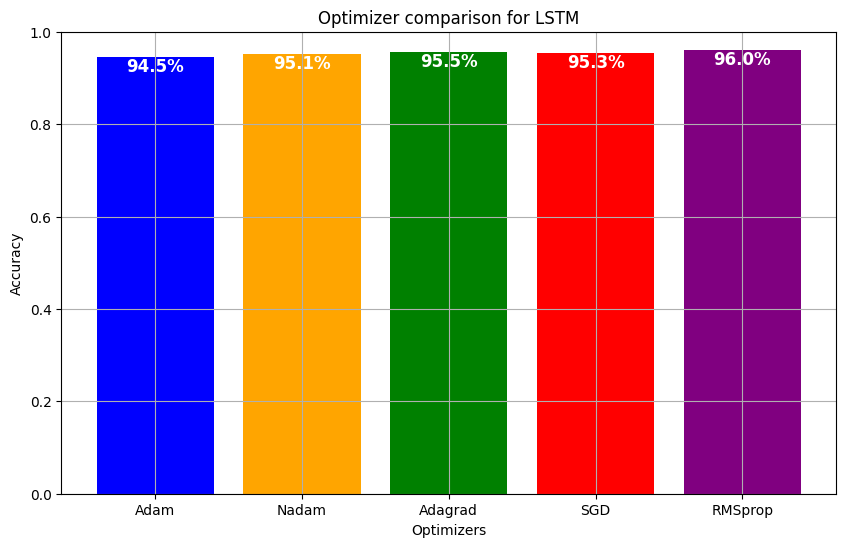

In [227]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
lstm_histories = [lstm_adam_history, lstm_nadam_history,
                  lstm_adagrad_history, lstm_sgd_history, lstm_rms_history]

plt.figure(figsize=(10, 6))

lstm_accuracies = [history.history['accuracy'][-1]
                   for history in lstm_histories]

lstm_bars = plt.bar(optimizers, lstm_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for LSTM")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in lstm_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


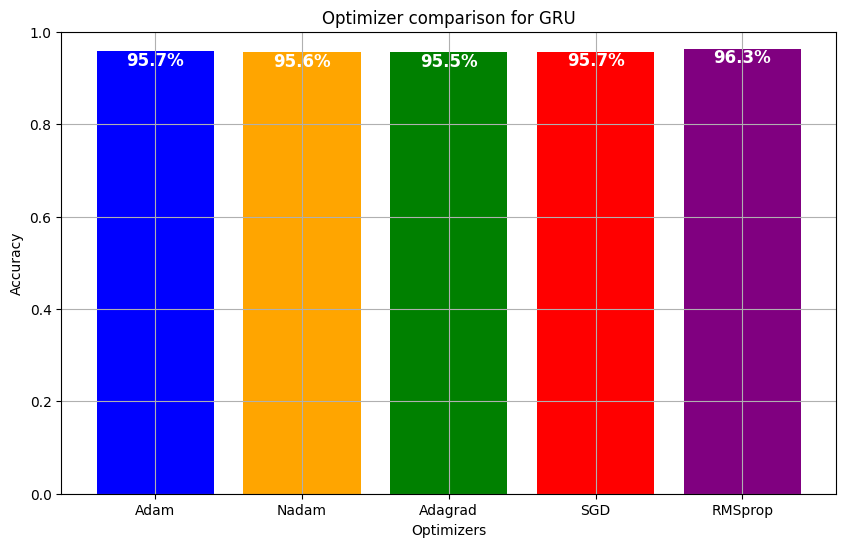

In [228]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
gru_histories = [gru_adam_history, gru_nadam_history,
                 gru_adagrad_history, gru_sgd_history, gru_rms_history]

plt.figure(figsize=(10, 6))

gru_accuracies = [history.history['accuracy'][-1] for history in gru_histories]

gru_bars = plt.bar(optimizers, gru_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for GRU")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in gru_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()


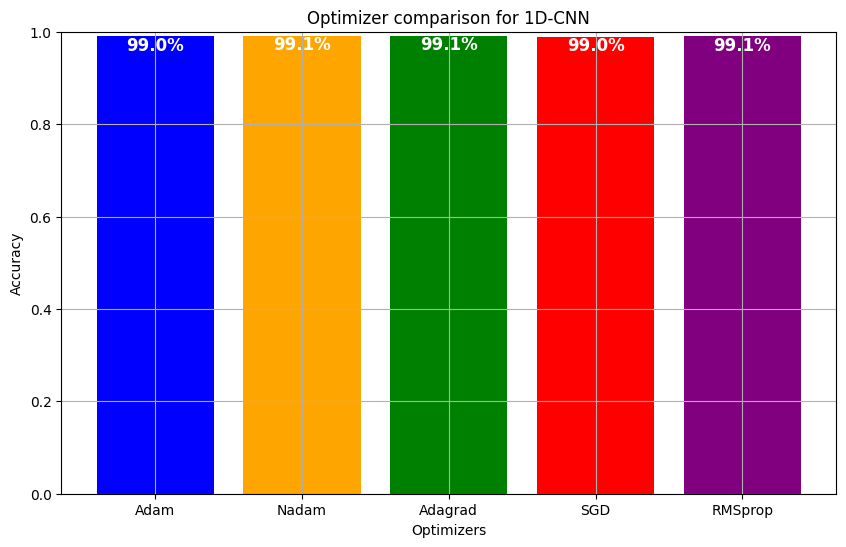

In [229]:
optimizers = ['Adam', 'Nadam', 'Adagrad', 'SGD', 'RMSprop']
cnn_histories = [cnn_adam_history, cnn_nadam_history,
                 cnn_adagrad_history, cnn_sgd_history, cnn_rms_history]

plt.figure(figsize=(10, 6))

cnn_accuracies = [history.history['accuracy'][-1] for history in cnn_histories]

cnn_bars = plt.bar(optimizers, cnn_accuracies, color=[
    'blue', 'orange', 'green', 'red', 'purple'])
plt.title("Optimizer comparison for 1D-CNN")
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid(True)

for bar in cnn_bars:
    y_val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, y_val,
             f'{y_val*100:.1f}%', ha='center', va='top', color='white', fontsize=12, fontweight='bold')

plt.show()
